In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data =  pd.read_excel("output.xlsx")
data

,Unnamed: 0,brand,model,transmission,year,km,owner,fuel,location,price
0,0,Volkswagen,Polo,Automatic,2018.0,"28,338km",1st,Petrol,mumbai,"₹3,94,799"
1,1,Maruti,Ertiga,Manual,2014.0,"27,724km",1st,Petrol,mumbai,"₹11,04,999"
2,2,Volkswagen,Polo,Automatic,2022.0,"49,051km",2nd,Petrol,mumbai,"₹4,05,599"
3,3,Honda,Amaze,Automatic,2013.0,"33,535km",1st,Petrol,mumbai,"₹4,68,199"
4,4,Hyundai,i20,Manual,2021.0,"38,910km",1st,Petrol,mumbai,"₹3,79,199"
...,...,...,...,...,...,...,...,...,...,...
3609,3609,Maruti,Ciaz,Manual,NaN,"34,846km",1st,Petrol,nodia,"₹5,42,299"
3610,3610,Hyundai,Elite i20,Manual,NaN,"46,087km",1st,Petrol,nodia,"₹5,22,299"
3611,3611,Hyundai,GRAND I10 NIOS,Automatic,NaN,"32,725km",1st,Petrol,nodia,"₹6,89,399"
3612,3612,Maruti,IGNIS,Manual,NaN,"20,265km",1st,Petrol,nodia,"₹5,17,999"


In [3]:
data.columns

Index(['Unnamed: 0', 'brand', 'model', 'transmission', 'year', 'km', 'owner',
       'fuel', 'location', 'price'],
      dtype='object')

In [4]:
data.shape

(3614, 10)

In [5]:
data.head()

,Unnamed: 0,brand,model,transmission,year,km,owner,fuel,location,price
0,0,Volkswagen,Polo,Automatic,2018.0,"28,338km",1st,Petrol,mumbai,"₹3,94,799"
1,1,Maruti,Ertiga,Manual,2014.0,"27,724km",1st,Petrol,mumbai,"₹11,04,999"
2,2,Volkswagen,Polo,Automatic,2022.0,"49,051km",2nd,Petrol,mumbai,"₹4,05,599"
3,3,Honda,Amaze,Automatic,2013.0,"33,535km",1st,Petrol,mumbai,"₹4,68,199"
4,4,Hyundai,i20,Manual,2021.0,"38,910km",1st,Petrol,mumbai,"₹3,79,199"


In [6]:
data.tail()

,Unnamed: 0,brand,model,transmission,year,km,owner,fuel,location,price
3609,3609,Maruti,Ciaz,Manual,NaN,"34,846km",1st,Petrol,nodia,"₹5,42,299"
3610,3610,Hyundai,Elite i20,Manual,NaN,"46,087km",1st,Petrol,nodia,"₹5,22,299"
3611,3611,Hyundai,GRAND I10 NIOS,Automatic,NaN,"32,725km",1st,Petrol,nodia,"₹6,89,399"
3612,3612,Maruti,IGNIS,Manual,NaN,"20,265km",1st,Petrol,nodia,"₹5,17,999"
3613,3613,Maruti,Swift,Manual,NaN,"16,387km",1st,Petrol,nodia,"₹6,62,899"


In [7]:
data.sample(17)

,Unnamed: 0,brand,model,transmission,year,km,owner,fuel,location,price
97,97,Renault,Captur,Manual,2018.0,"6,594km",1st,Petrol,kolkata,"₹6,60,331"
1429,1429,Tata,Tiago,NaN,2018.0,"71,556km",1st,Petrol,mumbai,"₹5,25,999"
1764,1764,Maruti,New Wagon-R,Manual,2020.0,"3,586km",1st,Petrol,ahmedbad,"₹5,52,299"
2433,2433,Honda,City,NaN,2020.0,"3,627km",1st,Petrol,gurgaon,"₹10,90,199"
1333,1333,Hyundai,Elite i20,NaN,2016.0,"33,200km",1st,Petrol,mumbai,"₹5,48,699"
631,631,Honda,City,Manual,2010.0,"70,658km",2nd,Petrol,hyderabad,"₹4,59,599"
2635,2635,Ford,Ecosport,NaN,2018.0,"38,694km",1st,Diesel,gurgaon,"₹7,98,999"
2213,2213,Maruti,Eeco,Manual,2020.0,"8,233km",1st,Petrol,kochi,"₹4,67,699"
2981,2981,Maruti,Swift,NaN,2015.0,"68,025km",1st,Petrol,gurgaon,"₹4,08,599"
1298,1298,Tata,Tiago,NaN,2018.0,"48,987km",1st,Petrol,mumbai,"₹5,03,599"


In [8]:
data.dtypes

Unnamed: 0        int64
brand            object
model            object
transmission     object
year            float64
km               object
owner            object
fuel             object
location         object
price            object
dtype: object

In [9]:
data.describe()

,Unnamed: 0,year
count,3614.000000,3024.000000
mean,1806.500000,2017.354167
std,1043.416264,2.323896
min,0.000000,2008.000000
25%,903.250000,2016.000000
50%,1806.500000,2018.000000
75%,2709.750000,2019.000000
max,3613.000000,2022.000000


In [10]:
data.isnull().sum()

Unnamed: 0         0
brand              1
model              1
transmission    1666
year             590
km                 1
owner              1
fuel               1
location           0
price              1
dtype: int64

In [11]:
data["km"] =    data ["km"] . str . replace ("," , "" )

In [12]:
data["km"] =    data ["km"] . str . replace ("km" , "" )

In [13]:

data["price"] =    data ["price"] . str . replace ("₹" , "")  . str . replace ("," , "" )

In [14]:
data

,Unnamed: 0,brand,model,transmission,year,km,owner,fuel,location,price
0,0,Volkswagen,Polo,Automatic,2018.0,28338,1st,Petrol,mumbai,394799
1,1,Maruti,Ertiga,Manual,2014.0,27724,1st,Petrol,mumbai,1104999
2,2,Volkswagen,Polo,Automatic,2022.0,49051,2nd,Petrol,mumbai,405599
3,3,Honda,Amaze,Automatic,2013.0,33535,1st,Petrol,mumbai,468199
4,4,Hyundai,i20,Manual,2021.0,38910,1st,Petrol,mumbai,379199
...,...,...,...,...,...,...,...,...,...,...
3609,3609,Maruti,Ciaz,Manual,NaN,34846,1st,Petrol,nodia,542299
3610,3610,Hyundai,Elite i20,Manual,NaN,46087,1st,Petrol,nodia,522299
3611,3611,Hyundai,GRAND I10 NIOS,Automatic,NaN,32725,1st,Petrol,nodia,689399
3612,3612,Maruti,IGNIS,Manual,NaN,20265,1st,Petrol,nodia,517999


In [15]:
data.drop( "Unnamed: 0" , axis = 1 ,   inplace = True)

In [16]:
data

,brand,model,transmission,year,km,owner,fuel,location,price
0,Volkswagen,Polo,Automatic,2018.0,28338,1st,Petrol,mumbai,394799
1,Maruti,Ertiga,Manual,2014.0,27724,1st,Petrol,mumbai,1104999
2,Volkswagen,Polo,Automatic,2022.0,49051,2nd,Petrol,mumbai,405599
3,Honda,Amaze,Automatic,2013.0,33535,1st,Petrol,mumbai,468199
4,Hyundai,i20,Manual,2021.0,38910,1st,Petrol,mumbai,379199
...,...,...,...,...,...,...,...,...,...
3609,Maruti,Ciaz,Manual,NaN,34846,1st,Petrol,nodia,542299
3610,Hyundai,Elite i20,Manual,NaN,46087,1st,Petrol,nodia,522299
3611,Hyundai,GRAND I10 NIOS,Automatic,NaN,32725,1st,Petrol,nodia,689399
3612,Maruti,IGNIS,Manual,NaN,20265,1st,Petrol,nodia,517999


In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [18]:
data["brand"]  = imp_cat.fit_transform(data["brand"].array.reshape(-1,1))

In [19]:
data["model"]  = imp_cat.fit_transform(data["model"].array.reshape(-1,1))

In [20]:
data["transmission"]  = imp_cat.fit_transform(data["transmission"].array.reshape(-1,1))

In [21]:
data["year"]  = imp.fit_transform(data["year"].array.reshape(-1,1))

In [22]:


data["km"]  = imp.fit_transform(data["km"].array.reshape(-1,1))

In [23]:
data["owner"]  = imp_cat.fit_transform(data["owner"].array.reshape(-1,1))

In [24]:
data["fuel"]  = imp_cat.fit_transform(data["fuel"].array.reshape(-1,1))

In [25]:
data["price"]  = imp.fit_transform(data["price"].array.reshape(-1,1))

In [26]:
data.dtypes

brand            object
model            object
transmission     object
year            float64
km              float64
owner            object
fuel             object
location         object
price           float64
dtype: object

In [27]:


from sklearn.preprocessing import OrdinalEncoder

In [28]:
oe = OrdinalEncoder()


In [29]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [30]:
data

,brand,model,transmission,year,km,owner,fuel,location,price
0,18.0,73.0,0.0,2018.000000,28338.0,0.0,1.0,7.0,394799.0
1,11.0,36.0,1.0,2014.000000,27724.0,0.0,1.0,7.0,1104999.0
2,18.0,73.0,0.0,2022.000000,49051.0,1.0,1.0,7.0,405599.0
3,4.0,12.0,0.0,2013.000000,33535.0,0.0,1.0,7.0,468199.0
4,5.0,118.0,1.0,2021.000000,38910.0,0.0,1.0,7.0,379199.0
...,...,...,...,...,...,...,...,...,...
3609,11.0,23.0,1.0,2017.354167,34846.0,0.0,1.0,8.0,542299.0
3610,5.0,33.0,1.0,2017.354167,46087.0,0.0,1.0,8.0,522299.0
3611,5.0,43.0,0.0,2017.354167,32725.0,0.0,1.0,8.0,689399.0
3612,11.0,52.0,1.0,2017.354167,20265.0,0.0,1.0,8.0,517999.0


In [31]:
corr = data.corr()
corr

,brand,model,transmission,year,km,owner,fuel,location,price
brand,1.000000,0.073054,0.058675,0.110105,0.009990,-0.075732,0.044110,0.004648,-0.140755
model,0.073054,1.000000,0.000547,-0.140686,0.099975,0.020742,-0.204318,0.044938,0.036506
transmission,0.058675,0.000547,1.000000,-0.067349,0.038957,-0.017609,-0.002739,-0.041388,-0.258214
year,0.110105,-0.140686,-0.067349,1.000000,-0.468710,-0.194710,0.153058,-0.089754,0.329025
km,0.009990,0.099975,0.038957,-0.468710,1.000000,0.058936,-0.396984,0.035228,-0.121677
owner,-0.075732,0.020742,-0.017609,-0.194710,0.058936,1.000000,-0.003950,-0.004937,-0.093834
fuel,0.044110,-0.204318,-0.002739,0.153058,-0.396984,-0.003950,1.000000,-0.141364,-0.244353
location,0.004648,0.044938,-0.041388,-0.089754,0.035228,-0.004937,-0.141364,1.000000,0.063653
price,-0.140755,0.036506,-0.258214,0.329025,-0.121677,-0.093834,-0.244353,0.063653,1.000000


<AxesSubplot:>

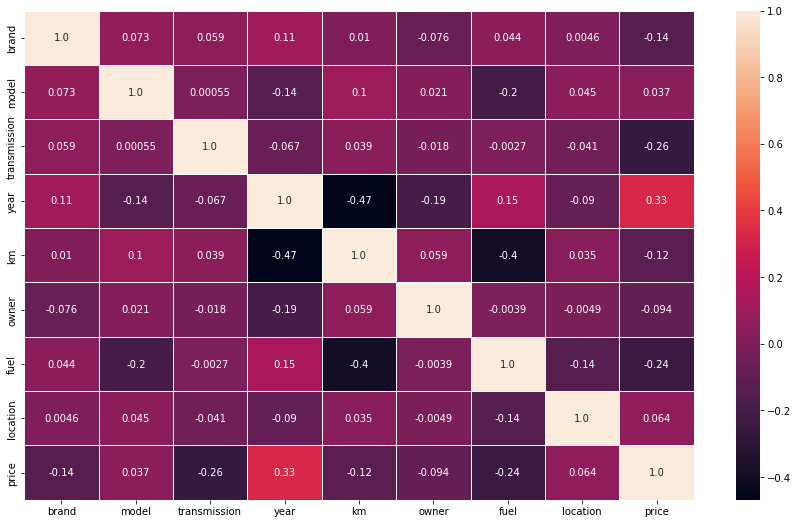

In [32]:
plt.figure(figsize =  (15,9))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

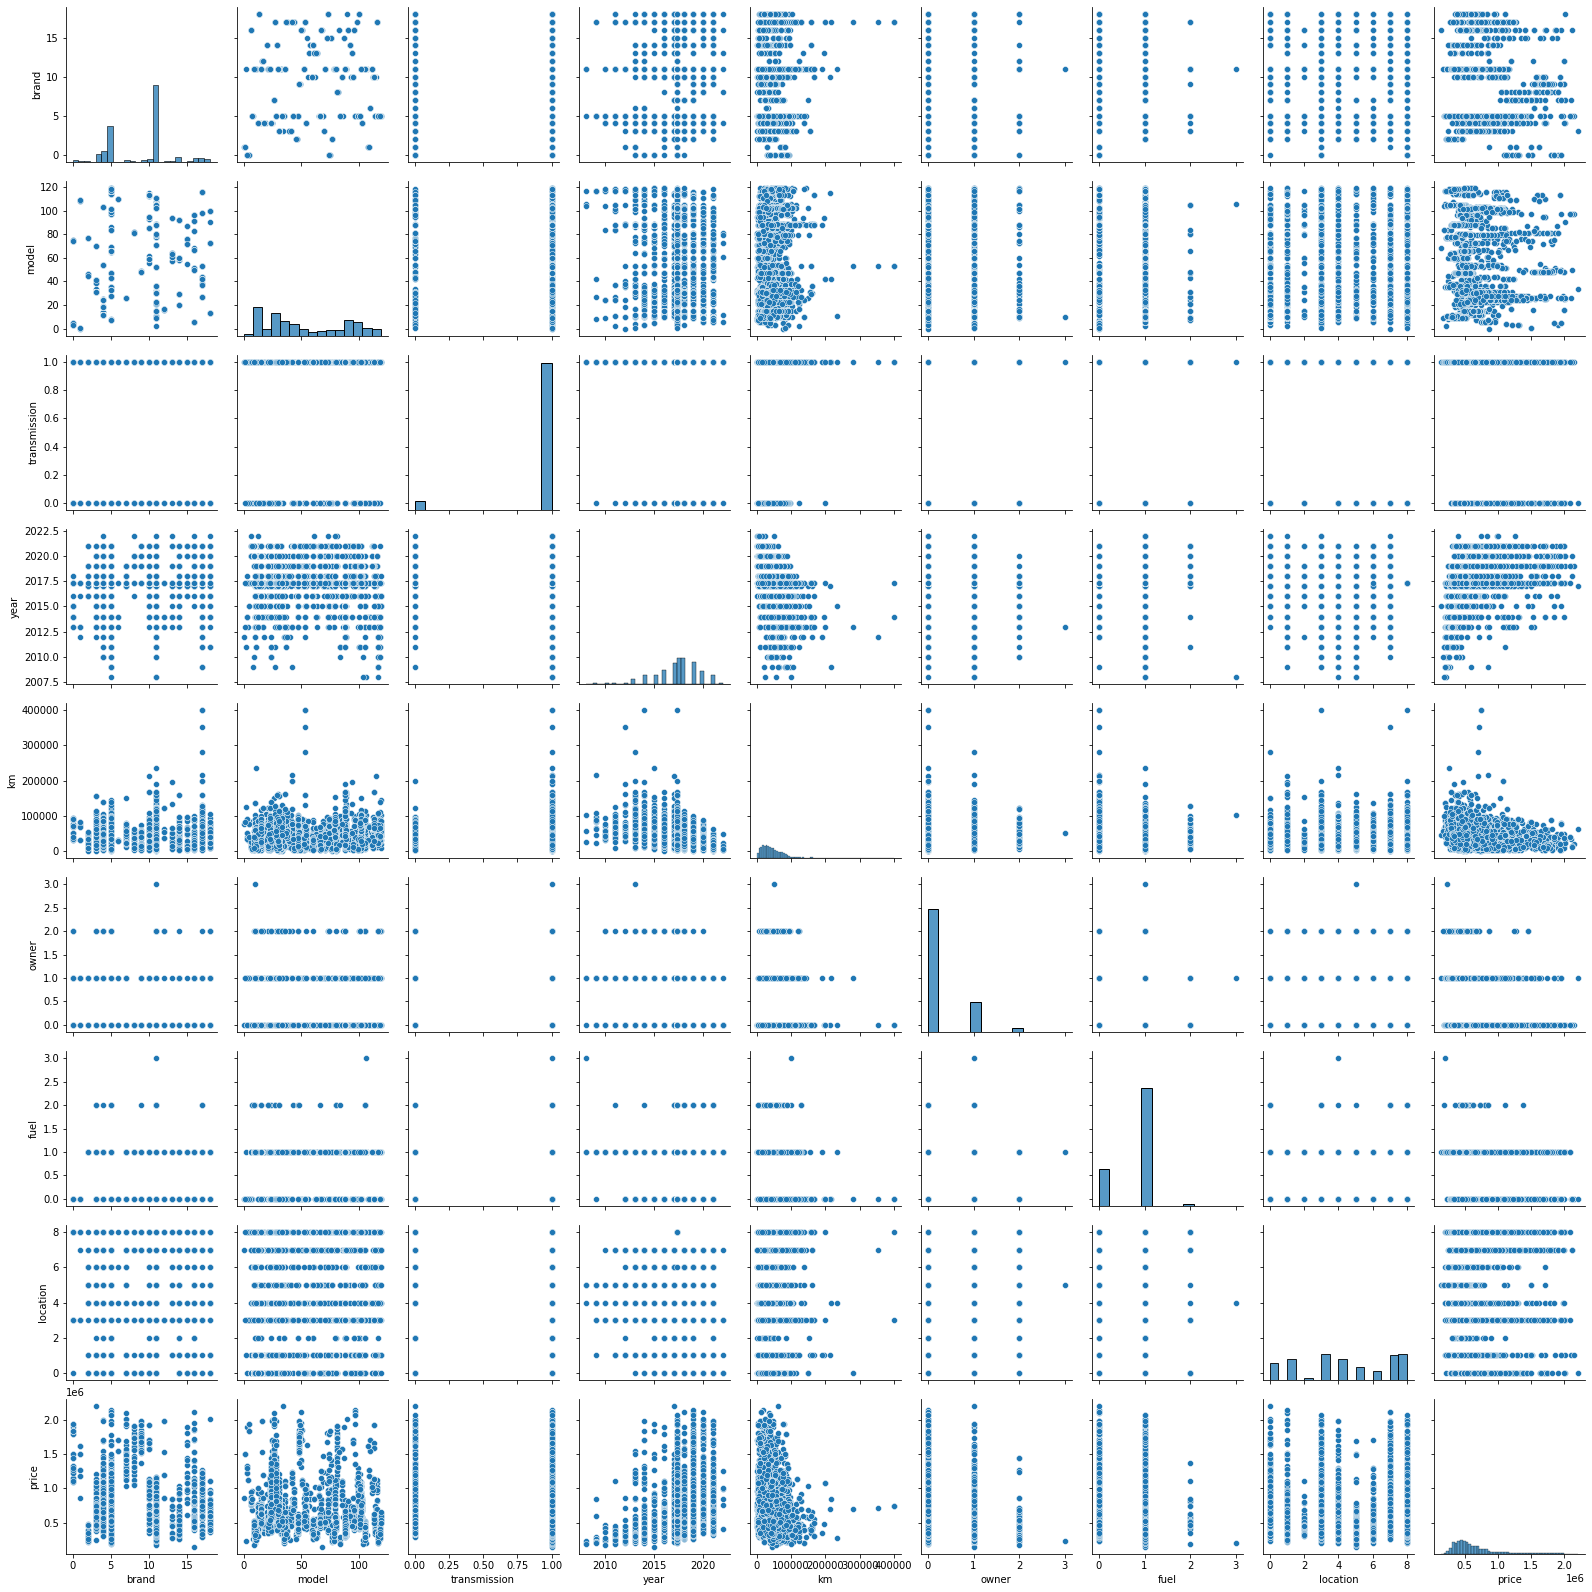

In [34]:
sns.pairplot(data)

<AxesSubplot:xlabel='year', ylabel='count'>

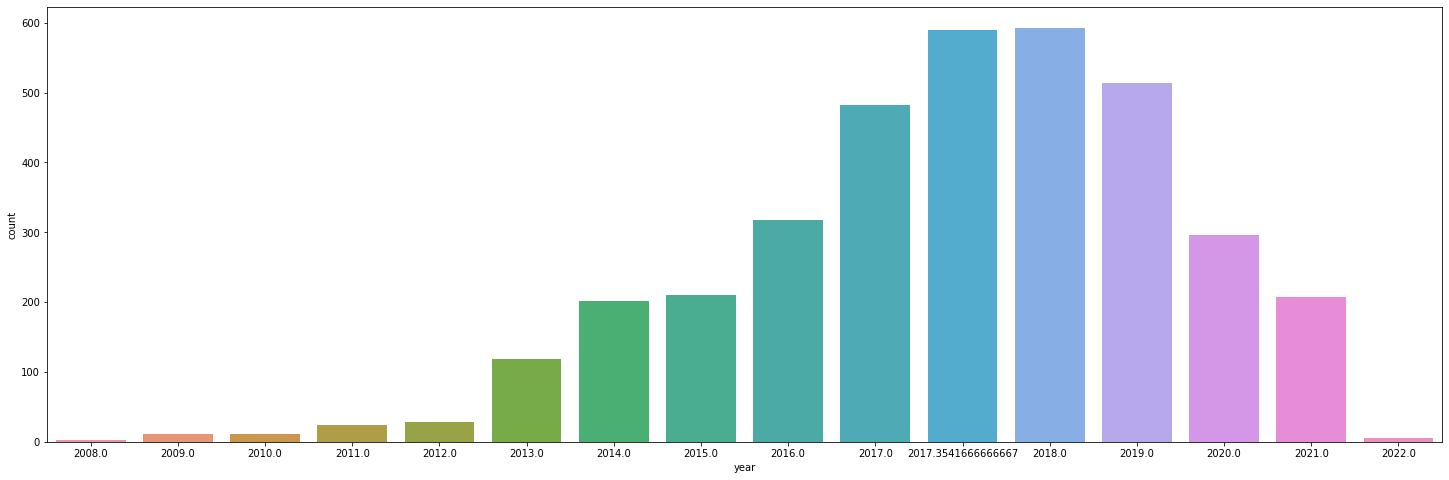

In [39]:
plt.figure(figsize=(25,8))

sns.countplot(data["year"]  , data = data)


<AxesSubplot:xlabel='km', ylabel='price'>

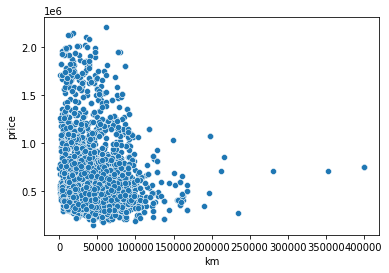

In [43]:
sns. scatterplot ( x = "km" , y = "price" , data = data)

<AxesSubplot:xlabel='year', ylabel='price'>

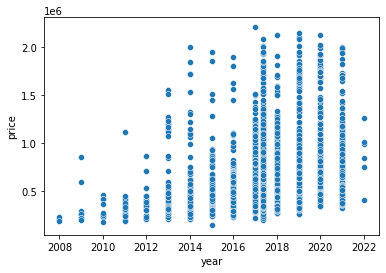

In [46]:
sns. scatterplot ( x = "year", y =  "price", data = data)

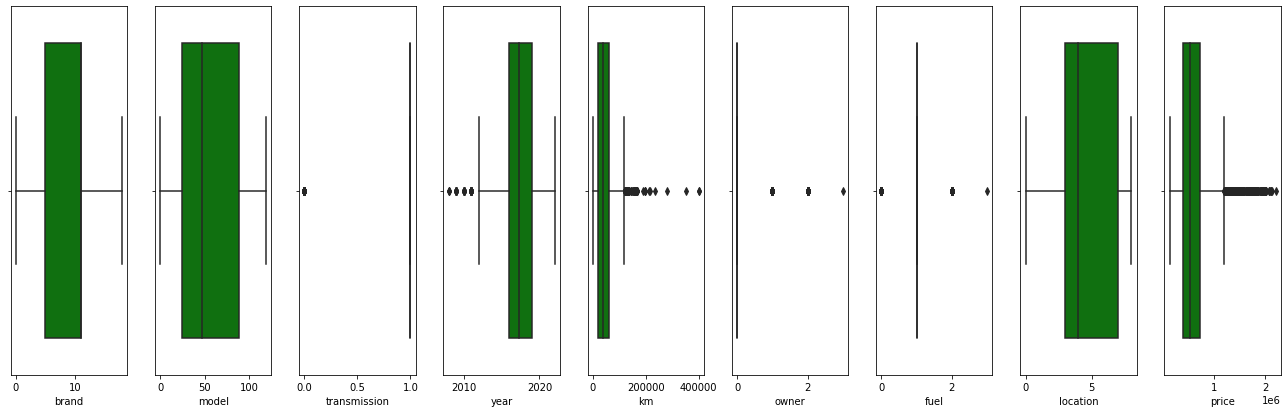

In [50]:
column = data.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [55]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
data.shape

(3614, 9)

In [56]:
threshold = 3
print(np.where(z>3))

(array([   0,    2,    3,    6,   10,   11,   18,   19,   24,   51,   54,
         57,   64,   66,   70,   72,   79,   80,   92,  105,  107,  117,
        141,  143,  155,  190,  194,  195,  199,  204,  208,  217,  217,
        244,  246,  256,  261,  264,  267,  270,  285,  299,  299,  309,
        317,  327,  331,  351,  359,  376,  389,  403,  408,  409,  409,
        410,  413,  413,  414,  420,  426,  431,  445,  449,  449,  456,
        465,  467,  469,  470,  472,  477,  477,  481,  487,  491,  513,
        516,  536,  537,  547,  548,  556,  556,  562,  575,  579,  579,
        580,  583,  596,  597,  602,  609,  615,  623,  630,  631,  638,
        645,  654,  666,  670,  676,  676,  679,  683,  683,  695,  698,
        703,  705,  709,  712,  723,  745,  750,  770,  812,  813,  817,
        821,  823,  824,  868,  875,  879,  891,  895, 1037, 1051, 1056,
       1099, 1123, 1144, 1153, 1162, 1168, 1174, 1201, 1223, 1230, 1238,
       1244, 1277, 1304, 1314, 1315, 1320, 1342, 1

In [64]:
 len(np.where(z>3)[0])

462

In [65]:
df = data[(z<3).all(axis=1)]

In [66]:
round(df["year"] , 4 )

1       2014.0000
4       2021.0000
5       2016.0000
7       2020.0000
8       2021.0000
          ...    
3608    2017.3542
3609    2017.3542
3610    2017.3542
3612    2017.3542
3613    2017.3542
Name: year, Length: 3196, dtype: float64

In [67]:
df

,brand,model,transmission,year,km,owner,fuel,location,price
1,11.0,36.0,1.0,2014.000000,27724.0,0.0,1.0,7.0,1104999.0
4,5.0,118.0,1.0,2021.000000,38910.0,0.0,1.0,7.0,379199.0
5,14.0,92.0,1.0,2016.000000,5248.0,0.0,1.0,7.0,659699.0
7,11.0,105.0,1.0,2020.000000,13712.0,0.0,1.0,7.0,358899.0
8,11.0,78.0,1.0,2021.000000,51486.0,1.0,1.0,7.0,316199.0
...,...,...,...,...,...,...,...,...,...
3608,3.0,31.0,1.0,2017.354167,85734.0,1.0,0.0,8.0,456299.0
3609,11.0,23.0,1.0,2017.354167,34846.0,0.0,1.0,8.0,542299.0
3610,5.0,33.0,1.0,2017.354167,46087.0,0.0,1.0,8.0,522299.0
3612,11.0,52.0,1.0,2017.354167,20265.0,0.0,1.0,8.0,517999.0


brand           float64
model           float64
transmission    float64
year            float64
km              float64
owner           float64
fuel            float64
location        float64
price           float64
dtype: object

In [73]:
df["year"] = df["year"].astype(int)

In [74]:
df

,brand,model,transmission,year,km,owner,fuel,location,price
1,11.0,36.0,1.0,2014,27724.0,0.0,1.0,7.0,1104999.0
4,5.0,118.0,1.0,2021,38910.0,0.0,1.0,7.0,379199.0
5,14.0,92.0,1.0,2016,5248.0,0.0,1.0,7.0,659699.0
7,11.0,105.0,1.0,2020,13712.0,0.0,1.0,7.0,358899.0
8,11.0,78.0,1.0,2021,51486.0,1.0,1.0,7.0,316199.0
...,...,...,...,...,...,...,...,...,...
3608,3.0,31.0,1.0,2017,85734.0,1.0,0.0,8.0,456299.0
3609,11.0,23.0,1.0,2017,34846.0,0.0,1.0,8.0,542299.0
3610,5.0,33.0,1.0,2017,46087.0,0.0,1.0,8.0,522299.0
3612,11.0,52.0,1.0,2017,20265.0,0.0,1.0,8.0,517999.0


In [77]:
df.skew ()

brand          -0.081163
model           0.354699
transmission    0.000000
year           -0.431687
km              0.682550
owner           1.520905
fuel           -0.986434
location       -0.090310
price           1.380827
dtype: float64

In [79]:
x =  df.drop(['price'] ,     axis = 1)

In [80]:
x

,brand,model,transmission,year,km,owner,fuel,location
1,11.0,36.0,1.0,2014,27724.0,0.0,1.0,7.0
4,5.0,118.0,1.0,2021,38910.0,0.0,1.0,7.0
5,14.0,92.0,1.0,2016,5248.0,0.0,1.0,7.0
7,11.0,105.0,1.0,2020,13712.0,0.0,1.0,7.0
8,11.0,78.0,1.0,2021,51486.0,1.0,1.0,7.0
...,...,...,...,...,...,...,...,...
3608,3.0,31.0,1.0,2017,85734.0,1.0,0.0,8.0
3609,11.0,23.0,1.0,2017,34846.0,0.0,1.0,8.0
3610,5.0,33.0,1.0,2017,46087.0,0.0,1.0,8.0
3612,11.0,52.0,1.0,2017,20265.0,0.0,1.0,8.0


In [82]:
y = df["price"]

In [83]:
y

1       1104999.0
4        379199.0
5        659699.0
7        358899.0
8        316199.0
          ...    
3608     456299.0
3609     542299.0
3610     522299.0
3612     517999.0
3613     662899.0
Name: price, Length: 3196, dtype: float64

In [84]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler ()

x = mms.fit_transform(x) 

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics  import    mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [86]:
ln = LinearRegression()
ln

LinearRegression()

In [87]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  24.792827166700604
 testing  score is  0 is 23.84856738994936 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  24.32980152592884
 testing  score is  1 is 25.930956025405038 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  24.323167317681815
 testing  score is  2 is 25.895649046834667 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  24.195759505418636
 testing  score is  3 is 25.775633202124272 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  25.257470952683548
 testing  score is  4 is 22.176101102700095 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  24.324780458444273
 testing  score is  5 is 25.763443397578556 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  24.20791669991106
 testi

at random state 87 model preforms best
at random_state =   87
training score at 87 is  23.71472541420686
 testing  score is  87 is 26.906700541569993 

at random state 88 model preforms best
at random_state =   88
training score at 88 is  25.56437618531666
 testing  score is  88 is 19.227062404749763 

at random state 89 model preforms best
at random_state =   89
training score at 89 is  25.962231278591442
 testing  score is  89 is 19.61242024362859 

at random state 90 model preforms best
at random_state =   90
training score at 90 is  26.86226180311958
 testing  score is  90 is 15.635737479841993 

at random state 91 model preforms best
at random_state =   91
training score at 91 is  25.12772686765974
 testing  score is  91 is 22.35715902819032 

at random state 92 model preforms best
at random_state =   92
training score at 92 is  24.405414196709064
 testing  score is  92 is 24.86720675284072 

at random state 93 model preforms best
at random_state =   93
training score at 93 is  24

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 47,test_size = .20)

In [89]:

ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
lss =r2_score(y_test, pred_test)
print('R2 score is ',lss)

R2 score is  0.18442165420101597


In [101]:

from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()

for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    random.fit(x_train,y_train)
    pred_train = random.predict(x_train)
    pred_test = random.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " , r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" ,   r2_score (y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  97.6502658383904
 testing  score is  0 is 80.44363738902189 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  97.71092643382102
 testing  score is  1 is 82.47413279335281 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  97.59860999065612
 testing  score is  2 is 85.62269090776655 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  97.8574102729365
 testing  score is  3 is 80.56688408747502 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  97.66137201552483
 testing  score is  4 is 85.13562361830874 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  97.56307875267763
 testing  score is  5 is 84.27709049431363 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  97.64311746322062
 testing  score is

at random state 55 model preforms best
at random_state =   55
training score at 55 is  97.7758171676311
 testing  score is  55 is 83.36254790659135 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  97.73394599009177
 testing  score is  56 is 83.93667523634176 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  98.02325007641392
 testing  score is  57 is 83.94932665595361 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  97.58405392307667
 testing  score is  58 is 85.76398053618914 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  97.67032747877418
 testing  score is  59 is 86.39957009985059 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  97.81077200303342
 testing  score is  60 is 86.15628856137009 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  97.94995

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 27 ,test_size = .20)

In [105]:

random.fit(x_train,y_train)
pred_train = random.predict(x_train)
pred_test = random.predict(x_test)
lss =r2_score(y_test, pred_test)
print('R2 score is ',lss)

R2 score is  0.8806204941250172


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kn = KFold(n_splits=5)

In [107]:
random =  RandomForestRegressor() 
gird_parameter = {  'criterion' : ["squared_error", "absolute_error"] , "max_features" : ["log2" , "sqrt"] ,'min_samples_leaf': [2, 10, 30] } 
cv = KFold(n_splits = 5, shuffle = False)


In [108]:
clf = GridSearchCV(random,gird_parameter  , n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2', 'min_samples_leaf': 2}


In [115]:
random =  RandomForestRegressor( criterion = "absolute_error" , max_features = "log2" ) 
random.fit(x_train,y_train)
pred_train = random.predict(x_train)
pred_test = random.predict(x_test)
print("training score at" ,r2_score(y_train, pred_train))
print(" testing  score is " , r2_score(y_test, pred_test)) 


training score at 0.9621643454267447
 testing  score is  0.8382275020368333


Text(0.5, 1.0, 'linear regression')

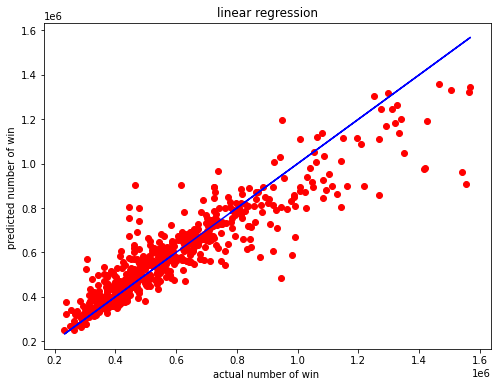

In [116]:
plt.figure(figsize = (8,6))
plt.scatter( x =  y_test , y  = pred_test , color = "r")
plt.plot(y_test, y_test , color = "b")
plt.xlabel("actual number of win ")
plt.ylabel("predicted number of win ")
plt.title("linear regression")